# Lab 7 Learning rate and Evaluation

In [44]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [22]:

import numpy as np
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777)

In [33]:
from tensorflow.examples.tutorials.mnist import input_data

In [34]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [35]:
nb_classes = 10

In [36]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

### Hypothesis (using softmax)

In [37]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [38]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

### Test model

In [39]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))

### Calculate accuracy

In [40]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

### parameters

In [41]:
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

Epoch: 0001, Cost: 2.739303153
Epoch: 0002, Cost: 1.100201546
Epoch: 0003, Cost: 0.882037727
Epoch: 0004, Cost: 0.775653089
Epoch: 0005, Cost: 0.708189887
Epoch: 0006, Cost: 0.659757182
Epoch: 0007, Cost: 0.621986477
Epoch: 0008, Cost: 0.592380619
Epoch: 0009, Cost: 0.567244958
Epoch: 0010, Cost: 0.546691902
Epoch: 0011, Cost: 0.528484820
Epoch: 0012, Cost: 0.512840953
Epoch: 0013, Cost: 0.498828149
Epoch: 0014, Cost: 0.486413467
Epoch: 0015, Cost: 0.475439426
Learning finished
Accuracy:  0.8871
Label:  [8]
Prediction:  [8]


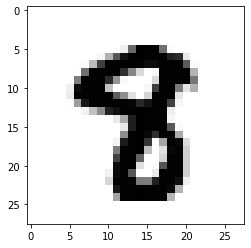

In [45]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()